INTRO

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15, 6]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

LOAD DATA

In [3]:
data = pd.read_csv('data/raw.csv', encoding='utf-8')
data.head()

,Date,Day of Week,# in Line,Line-up Time,Pick-up Time,Notes
0,6/8/2016,Wednesday,19,7:50:00 AM,8:05:00 AM,NaN
1,6/9/2016,Thursday,4,7:26:00 AM,7:29:00 AM,NaN
2,6/9/2016,Thursday,19,8:01:00 AM,8:21:00 AM,Bus arrived as I got in line
3,6/10/2016,Friday,9,7:30:00 AM,7:38:00 AM,NaN
4,6/10/2016,Friday,21,7:50:00 AM,8:00:00 AM,Took the bus after 10 minutes


add timestamp columns

In [4]:
data['timestamp_arrive'] = pd.to_datetime(data['Date']+' '+data['Line-up Time'])
data['timestamp_depart'] = pd.to_datetime(data['Date']+' '+data['Pick-up Time'])

CLEAN-UP columns

In [5]:
data = data.rename(columns={'Day of Week':'weekday',
                            '# in Line':'line_count',
                            'Notes':'notes'})

In [6]:
data = data.drop(['Date', 'Line-up Time', 'Pick-up Time'], axis=1)

In [7]:
data.head()

,weekday,line_count,notes,timestamp_arrive,timestamp_depart
0,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00
1,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00
2,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00
3,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00
4,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00


one numeric columns, let's see what it looks like

In [8]:
data.describe()

,line_count
count,255.00
mean,9.55
std,7.58
min,0.00
25%,3.00
50%,8.00
75%,15.00
max,31.00


plot the one numeric column

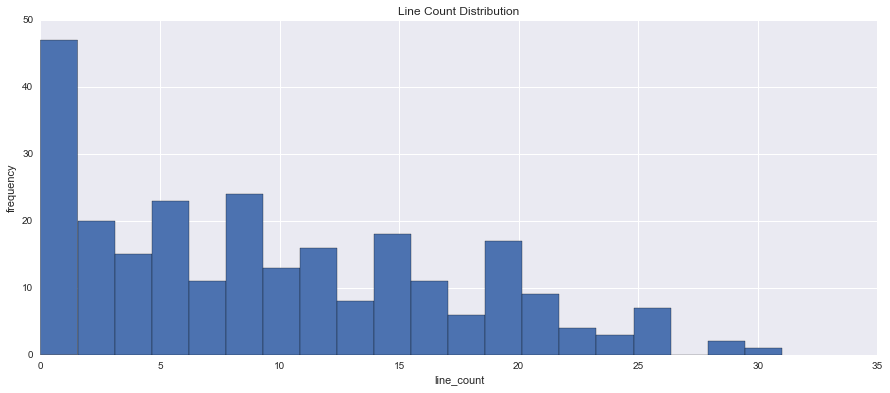

In [35]:
data['line_count'].hist(bins=20)
plt.title('Line Count Distribution')
plt.xlabel('line_count')
plt.ylabel('frequency')

store data for future analysis

In [20]:
data.to_csv('data/data.csv')

,weekday,line_count,notes,timestamp_arrive,timestamp_depart
0,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00
1,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00
2,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00
3,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00
4,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00


next steps